In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

%matplotlib inline

## Вид рассматриваемого решения

Будем рассматривать развитие единичного канала в материале №1 из файла.

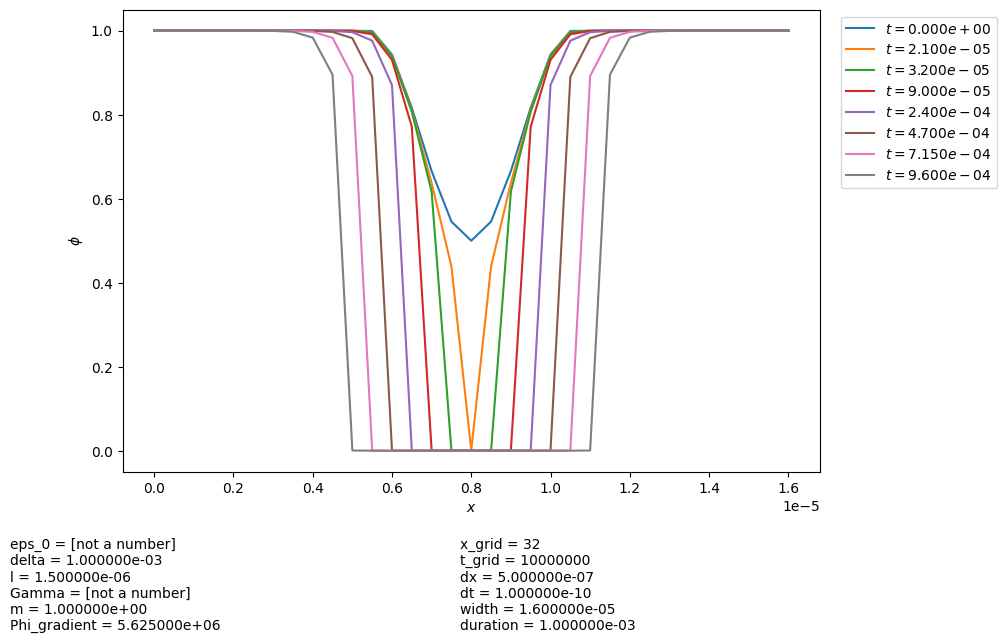

In [2]:
model_overview = model_from_file('data/model_overview.csv')
fall_ts = [2.1e-5, 3.2e-5, 9e-5, 2.4e-4, 4.7e-4, 7.15e-4, 9.6e-4]
model_plot(model_overview, [0] + fall_ts, figsize=(9, 6))

## Подбор шага по времени

Для подбора шага по времени попробуем использовать два следующих метода.

1. По величине $\left\| \cfrac{\partial \phi}{\partial t} \right\|_C$: $\quad \tau \sim \cfrac{1}{\| \phi'_t \|_C}$.
2. По величине $\left| \cfrac{d \Pi}{d t} \right| = - \cfrac{1}{m} \left( \left\| \cfrac{\partial \phi}{\partial t} \right\|_{L2} \right)^2$: $ \quad \tau \sim \cfrac{1}{| \Pi'_t |}$.

В обоих случаях значения $\tau$ ограничены отрезком $[\tau_{min}, \; \tau_{max}]$, где $\tau_{min} = \tau_0$ -- шаг исходной сетки, $\tau_{max} = \tau_h$ -- предельно крупный шаг, задаваемый условием устойчивости по разностному оператору Лапласа.

In [3]:
model_t_detailed = model_from_file('data/model_t_detailed.csv')

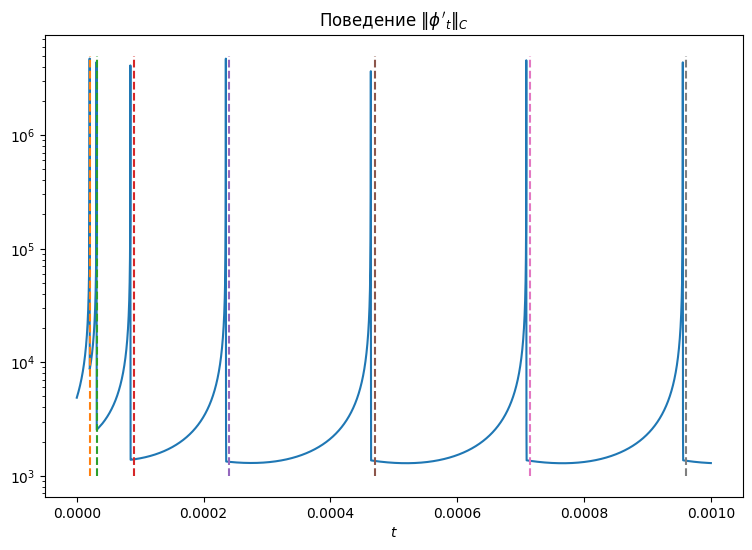

In [4]:
plt.figure(figsize=(9, 6))
plt.title(r"Поведение $\|\phi'_t\|_C$")
plt.xlabel('$t$')
plt.yscale('log')
plt.plot(model_t_detailed.ts, model_t_detailed._phi_t_norm)
for i in range(len(fall_ts)):
    plt.plot([fall_ts[i], fall_ts[i]], [1e3, 5e6], '--', color='C'+str(i + 1))
plt.show()

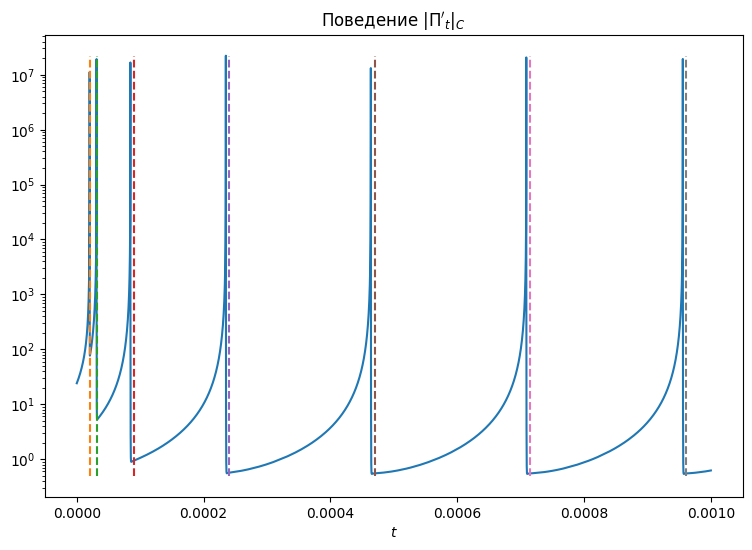

In [5]:
plt.figure(figsize=(9, 6))
plt.title(r"Поведение $|\Pi'_t|_C$")
plt.xlabel('$t$')
plt.yscale('log')
plt.plot(model_t_detailed.ts, model_t_detailed._energy_t_abs)
for i in range(len(fall_ts)):
    plt.plot([fall_ts[i], fall_ts[i]], [5e-1, 2.2e7], '--', color='C'+str(i + 1))
plt.show()

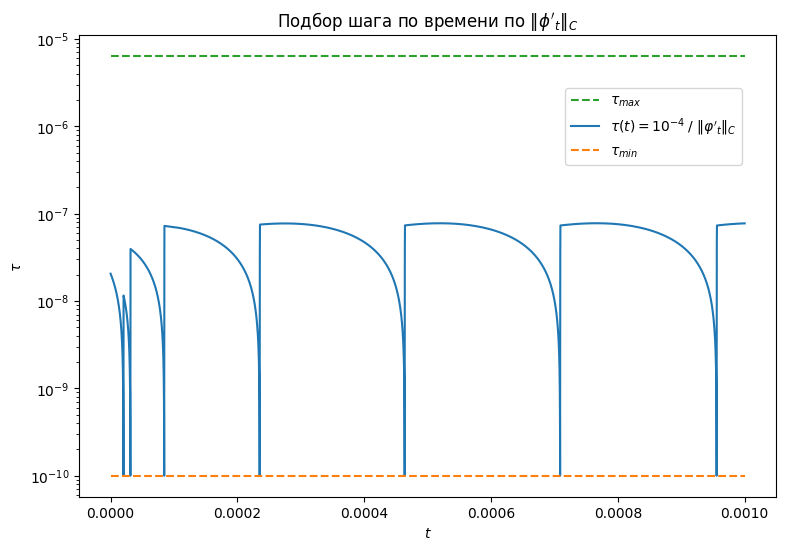

In [6]:
plt.figure(figsize=(9, 6))
plt.title(r"Подбор шага по времени по $\|\phi'_t\|_C$")
plt.xlabel('$t$')
plt.ylabel(r'$\tau$')
plt.yscale('log')
plt.plot([0, 1e-3], [6.42e-6, 6.42e-6], '--', color='C2')
plt.plot(model_t_detailed.ts, model_t_detailed._dt_adaptive_phi, color='C0')
plt.plot([0, 1e-3], [1e-10, 1e-10], '--', color='C1')
plt.legend([
    r'$\tau_{max}$',
    r"$\tau(t) = 10^{-4} \; / \; \|\varphi'_t\|_C$",
    r'$\tau_{min}$'
], bbox_to_anchor=(0.96, 0.9))
plt.show()

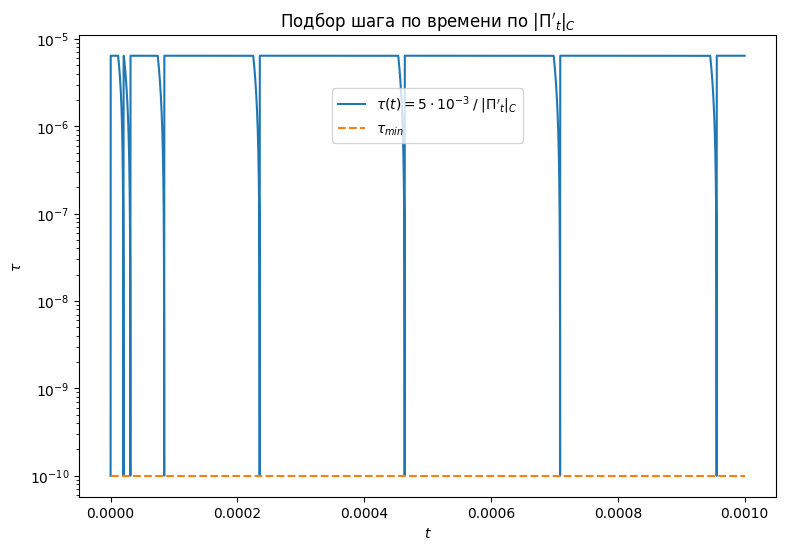

In [7]:
plt.figure(figsize=(9, 6))
plt.title(r"Подбор шага по времени по $|\Pi'_t|_C$")
plt.xlabel('$t$')
plt.ylabel(r'$\tau$')
plt.yscale('log')
plt.plot(model_t_detailed.ts, model_t_detailed._dt_adaptive_energy, color='C0')
plt.plot([0, 1e-3], [1e-10, 1e-10], '--', color='C1')
plt.legend([
    r"$\tau(t) = 5 \cdot 10^{-3} \; / \; |\Pi'_t|_C$",
    r'$\tau_{min}$'
], bbox_to_anchor=(0.5, 0.9))
plt.show()

## Детальное рассмотрение "пика"

Рассмотрим первый "пик" величины $\| \phi'_t \|_C$ в более крупном масштабе.

In [8]:
model_t_more = model_from_file('data/model_t_more.csv')

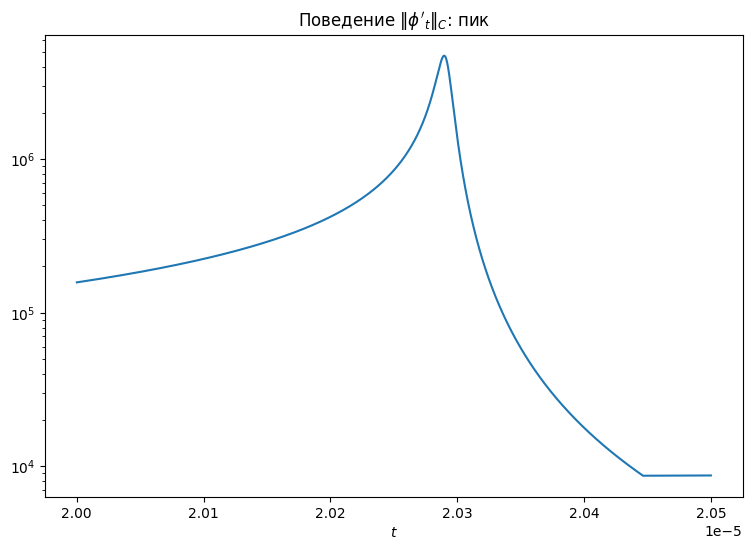

In [9]:
plt.figure(figsize=(9, 6))
plt.title(r"Поведение $\|\phi'_t\|_C$: пик")
plt.xlabel('$t$')
plt.yscale('log')
plt.plot(model_t_more.ts, model_t_more._phi_t_norm)
plt.show()

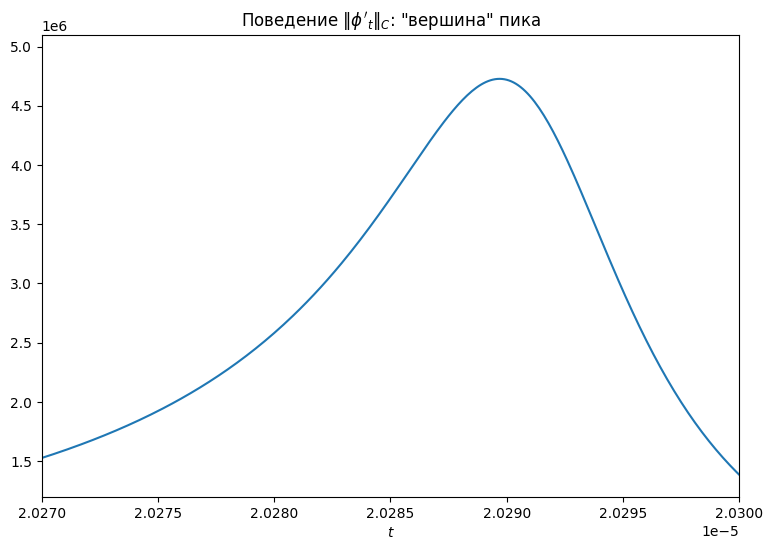

In [10]:
plt.figure(figsize=(9, 6))
plt.title(r"Поведение $\|\phi'_t\|_C$: " + '"вершина" пика')
plt.xlabel('$t$')
plt.xlim([2.027e-5, 2.03e-5])
plt.ylim([1.2e6, 5.1e6])
plt.plot(model_t_more.ts, model_t_more._phi_t_norm)
plt.show()

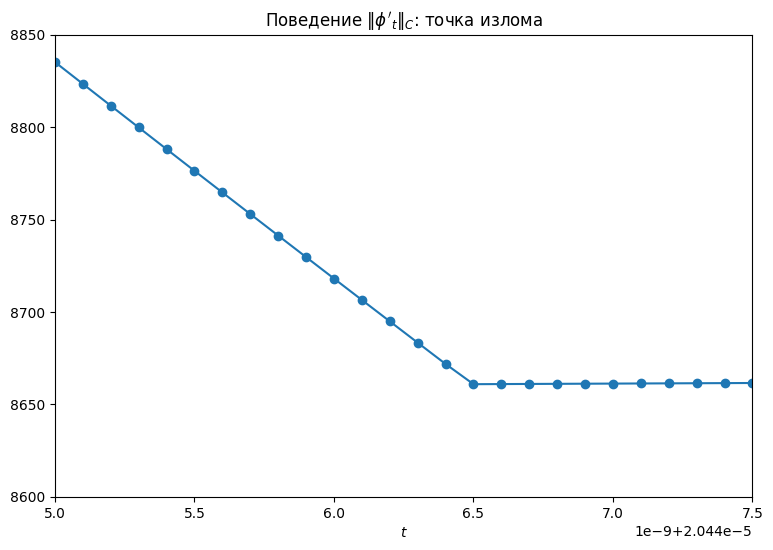

In [13]:
plt.figure(figsize=(9, 6))
plt.title(r"Поведение $\|\phi'_t\|_C$: точка излома")
plt.xlabel('$t$')
plt.xlim([2.04450e-5, 2.04475e-5])
plt.ylim([8.6e3, 8.85e3])
plt.plot(model_t_more.ts, model_t_more._phi_t_norm, 'o-')
plt.show()

Видно, что график гладкий (включая пик), за исключением одной точки "излома" правее пика. Это не должно смущать, так как мы имеем дело с величиной
$$ \left\| \left[ \phi'_t \right]^j \right\|_C = \max_{i = 1}^N \left| \left[ \phi'_t \right]_i^j \right|,$$
которая при недостаточном разрешении сетки по пространству может иметь существенные "изломы", даже являясь максимумом конечного числа гладких функций.